 SUPPORT VECTOR MACHINES: OPTIMAL DECISION BOUNDARIES

All libraries imported successfully!
NumPy version: 2.0.2
Pandas version: 2.2.2


 GENERATING SYNTHETIC DATASETS

Generated 3 datasets:
  1. Linear: 200 samples (linearly separable)
  2. Circles: 200 samples (non-linear, concentric)
  3. Moons: 200 samples (non-linear, crescent-shaped)

Data split for each dataset:
  Training: 140 samples (70%)
  Test: 60 samples (30%)
  All features scaled to mean=0, std=1

 VISUALIZING DATASETS


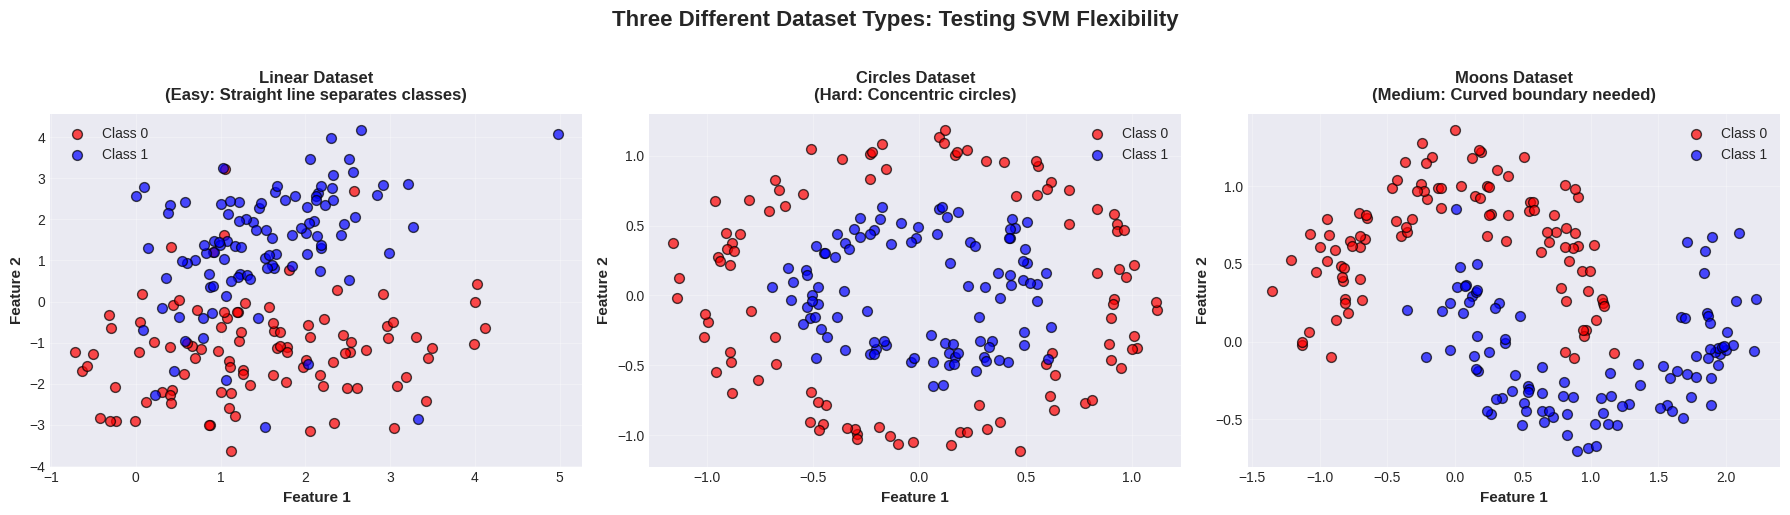


✓ Dataset visualization saved as 'svm_datasets_overview.png'

 EXPERIMENT 1: LINEAR SVM WITH DIFFERENT C VALUES

Training Linear SVM with different C values...

C=  0.01 | Train: 0.8357 | Test: 0.8667 | Support Vectors: 122 | Underfit
C=  0.10 | Train: 0.8786 | Test: 0.8667 | Support Vectors:  72 | Optimal
C=  1.00 | Train: 0.8929 | Test: 0.8667 | Support Vectors:  55 | Optimal
C= 10.00 | Train: 0.8929 | Test: 0.8667 | Support Vectors:  53 | Optimal
C=100.00 | Train: 0.8929 | Test: 0.8667 | Support Vectors:  52 | Overfit Risk

KEY FINDINGS:
Best test accuracy: 0.8667 at C=0.01
Optimal C balances margin width and training accuracy

 CREATING LINEAR SVM COMPARISON


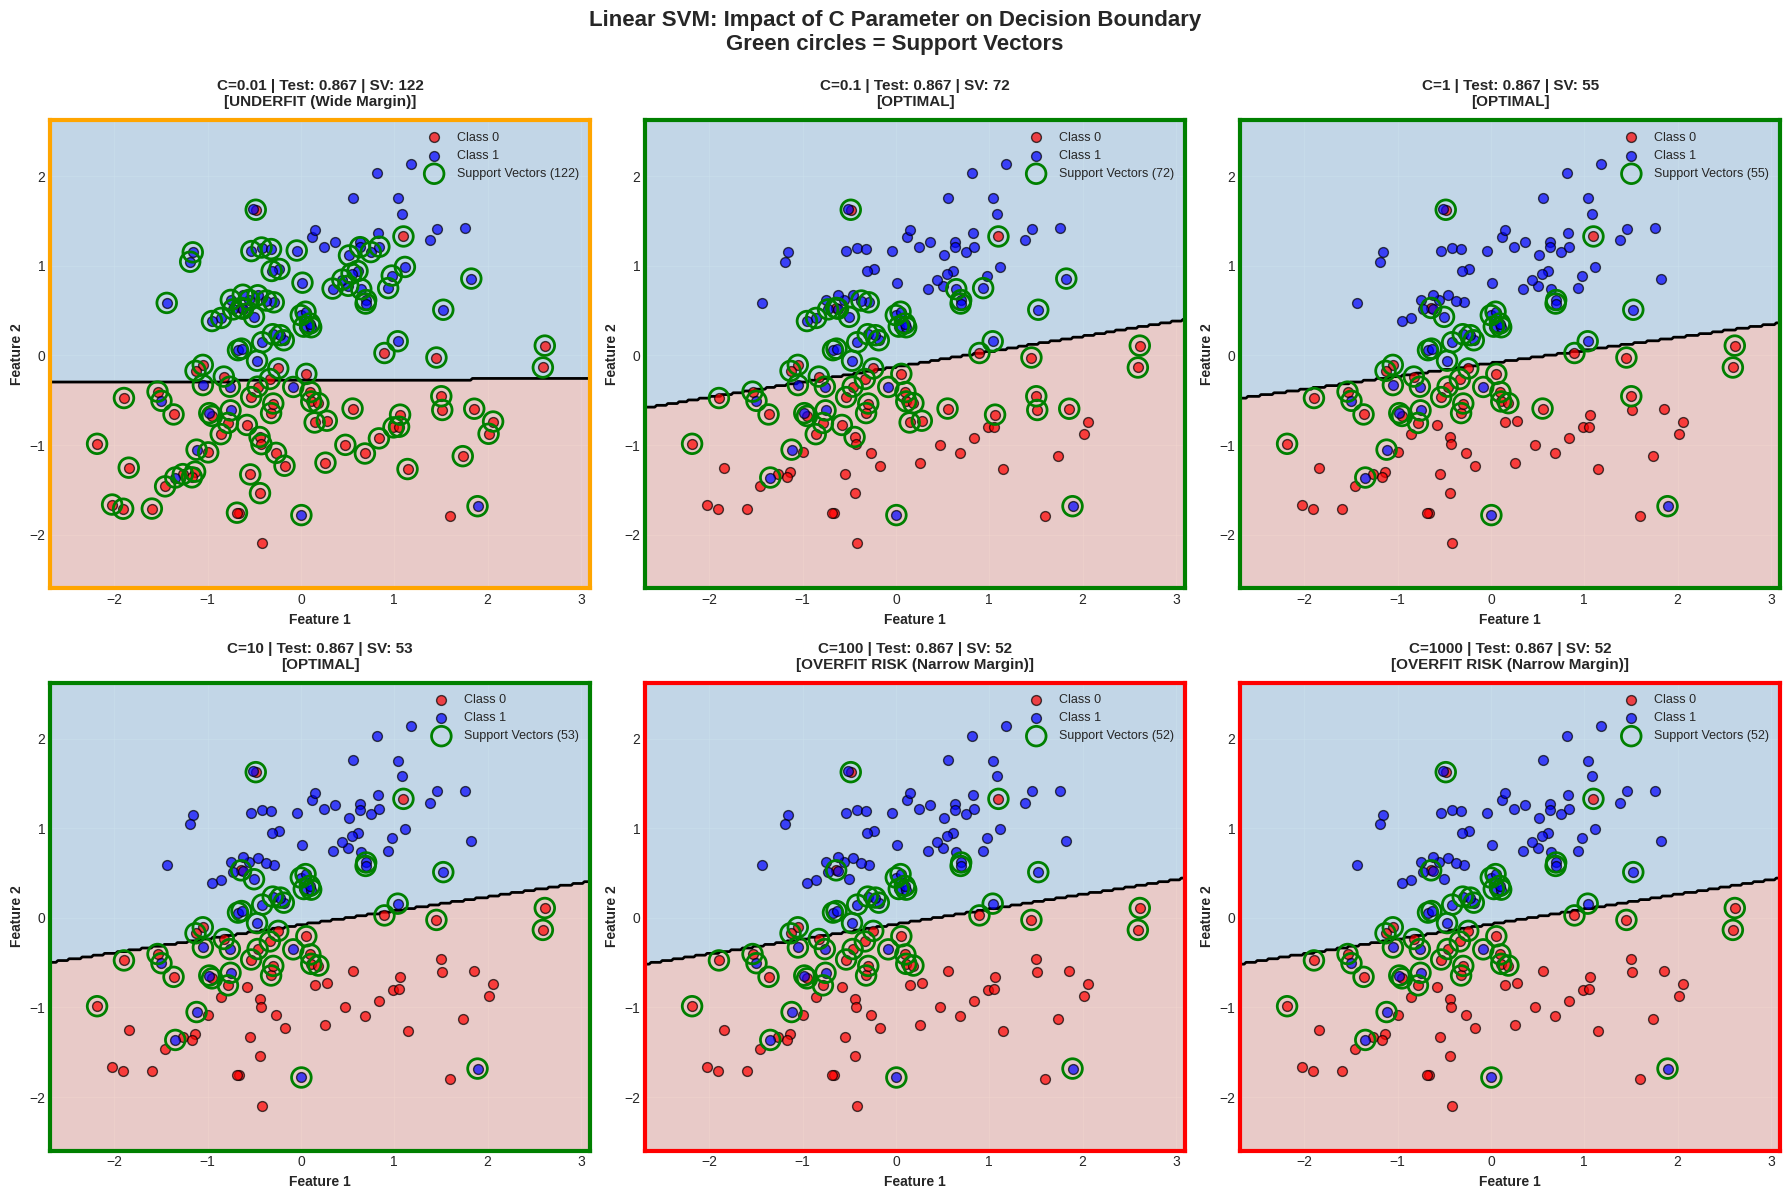


✓ Linear SVM comparison saved as 'svm_linear_c_comparison.png'

 EXPERIMENT 2: LINEAR VS RBF KERNEL


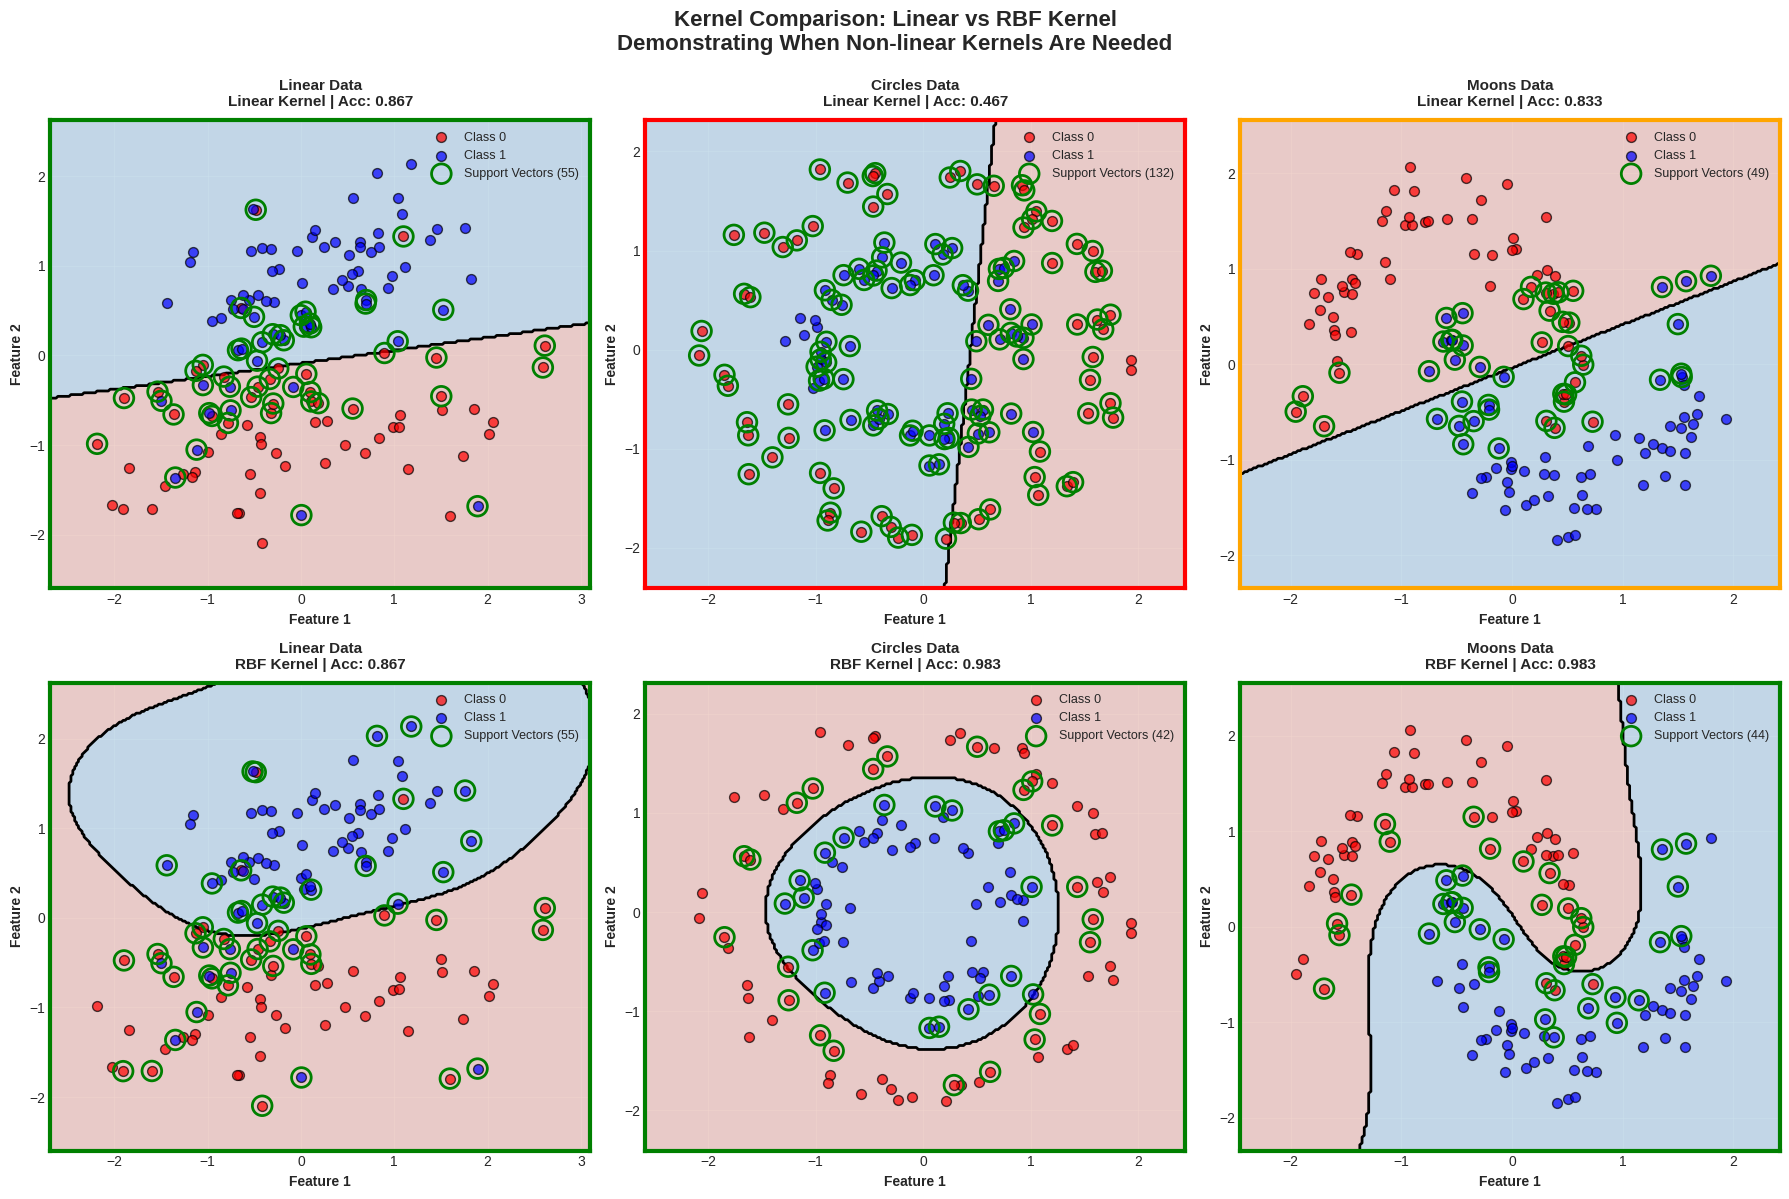


✓ Kernel comparison saved as 'svm_kernel_comparison.png'

KERNEL COMPARISON RESULTS:
     Dataset  Linear Accuracy  RBF Accuracy  Improvement
 Linear Data         0.866667      0.866667     0.000000
Circles Data         0.466667      0.983333     0.516667
  Moons Data         0.833333      0.983333     0.150000

KEY INSIGHT:
  - Linear kernel works well for linearly separable data
  - RBF kernel is essential for non-linear boundaries
  - RBF kernel can also handle linear data (but may overfit)

 EXPERIMENT 3: RBF GAMMA PARAMETER


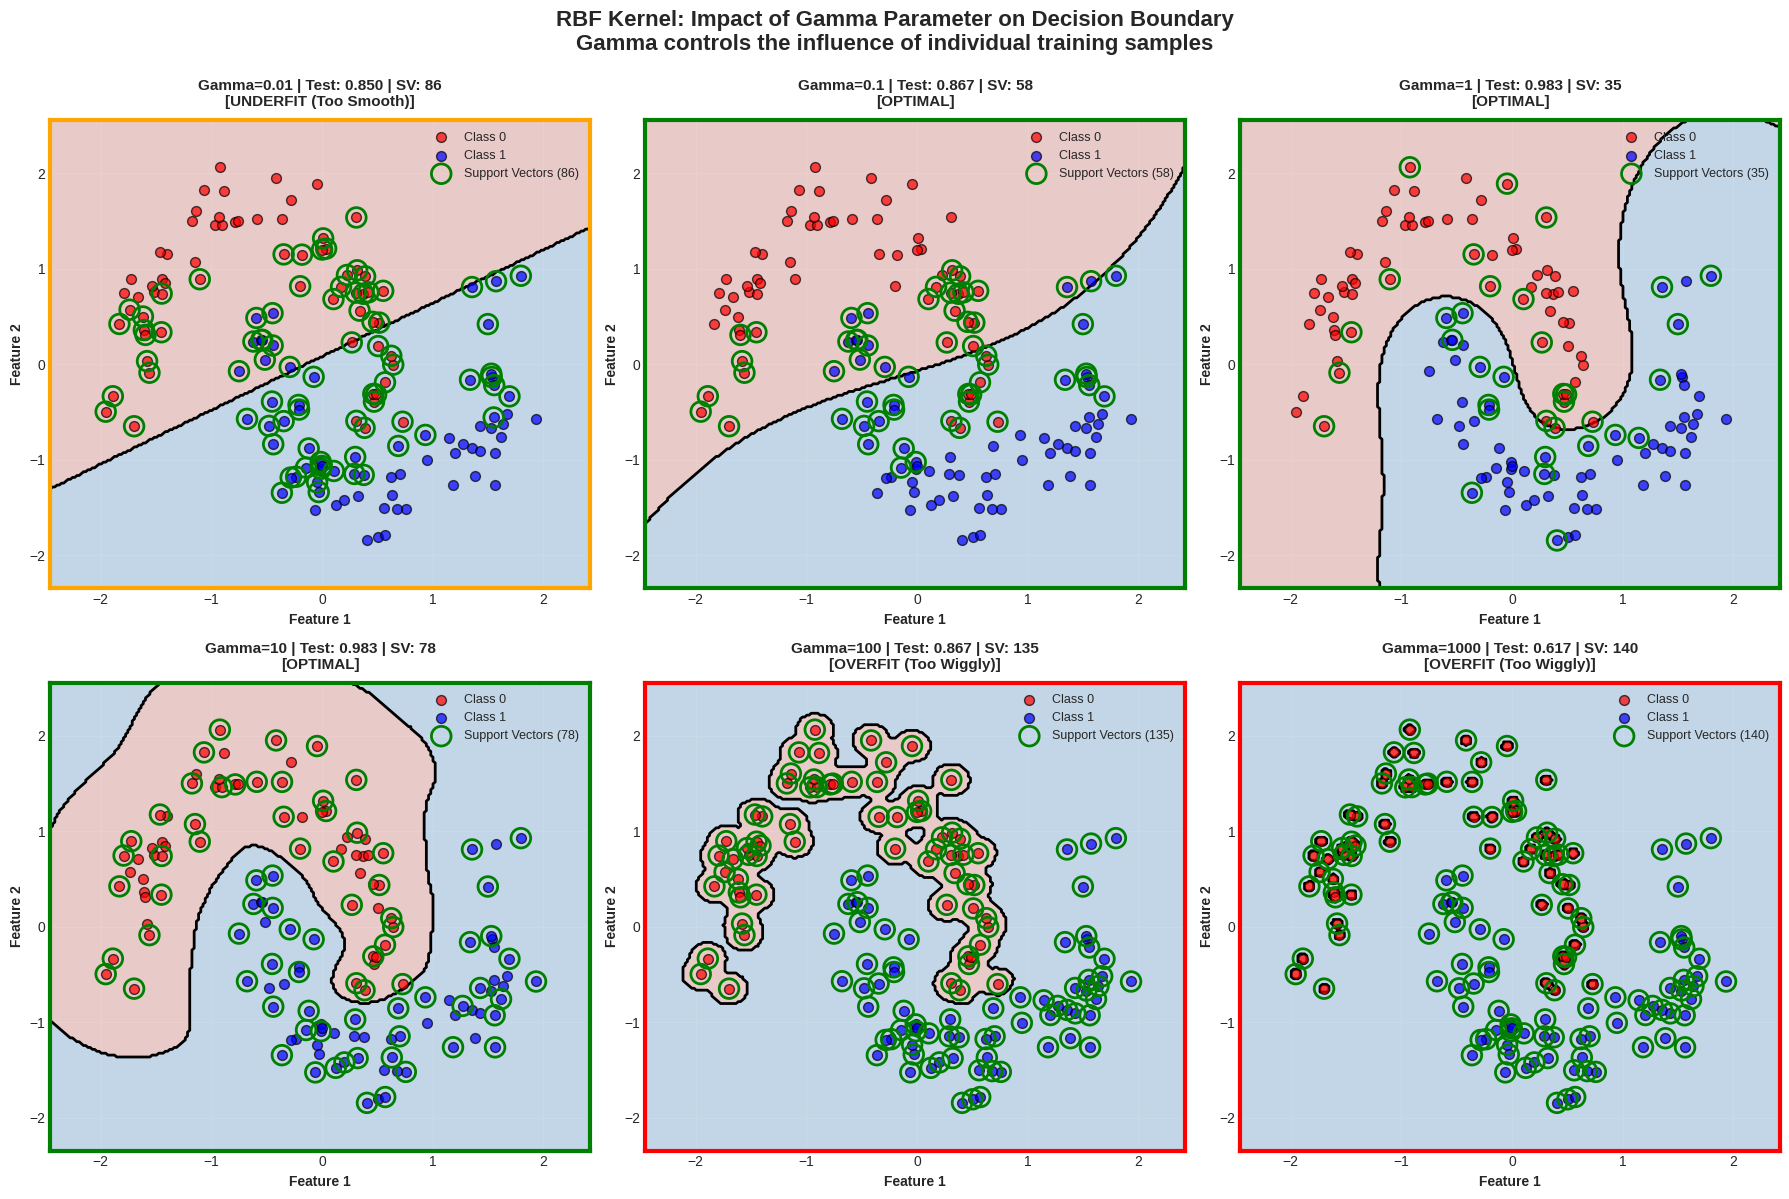


✓ RBF gamma comparison saved as 'svm_rbf_gamma_comparison.png'

 EXPERIMENT 4: GRID SEARCH FOR OPTIMAL C AND GAMMA

Searching C x Gamma grid...

Best parameters found:
  C = 0.1
  Gamma = 1.0
  Test Accuracy = 0.9833


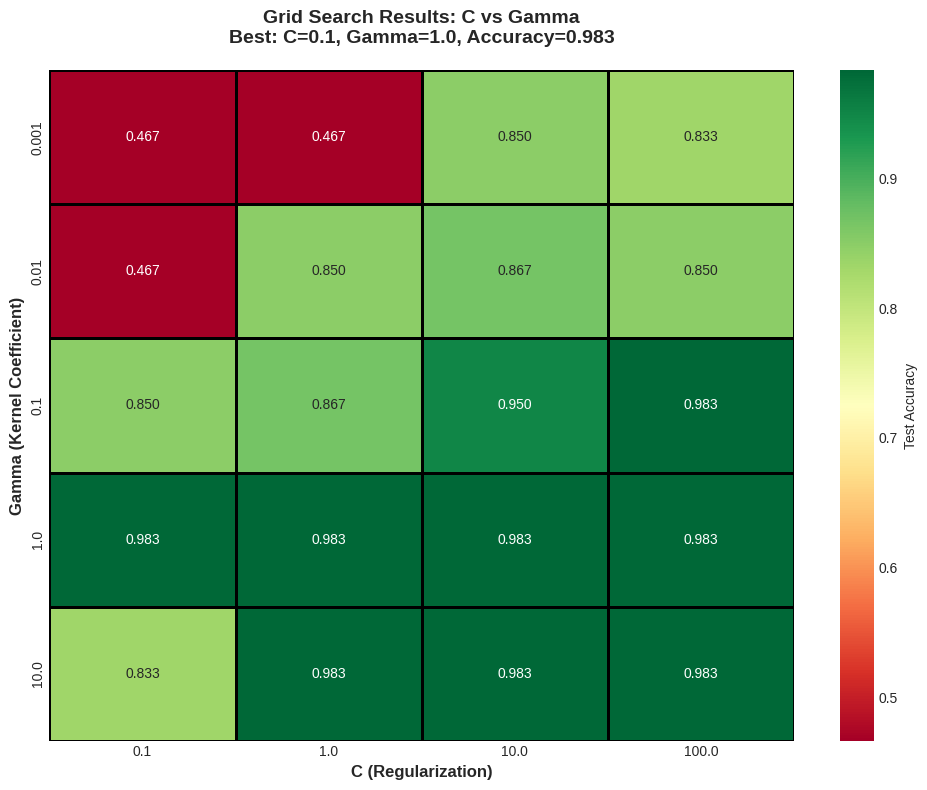


✓ Grid search heatmap saved as 'svm_grid_search_heatmap.png'

 PERFORMANCE SUMMARY ACROSS ALL EXPERIMENTS


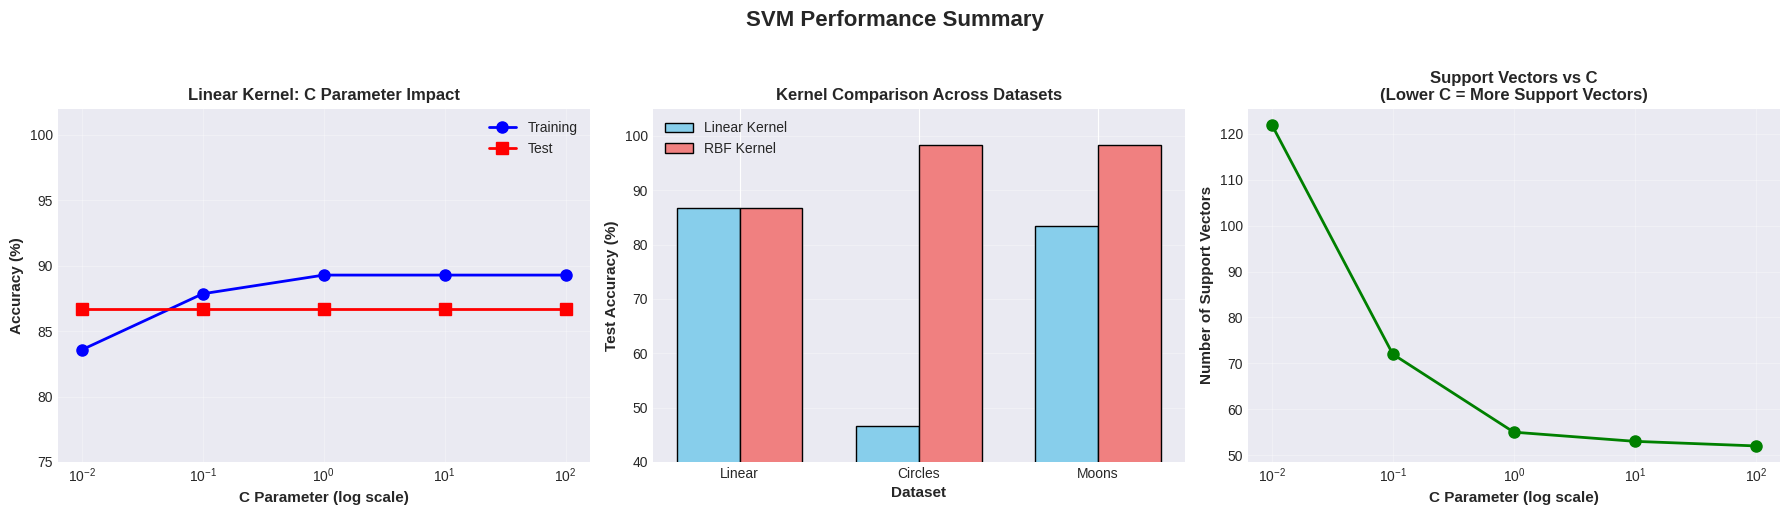


✓ Performance summary saved as 'svm_performance_summary.png'

 CONFUSION MATRICES


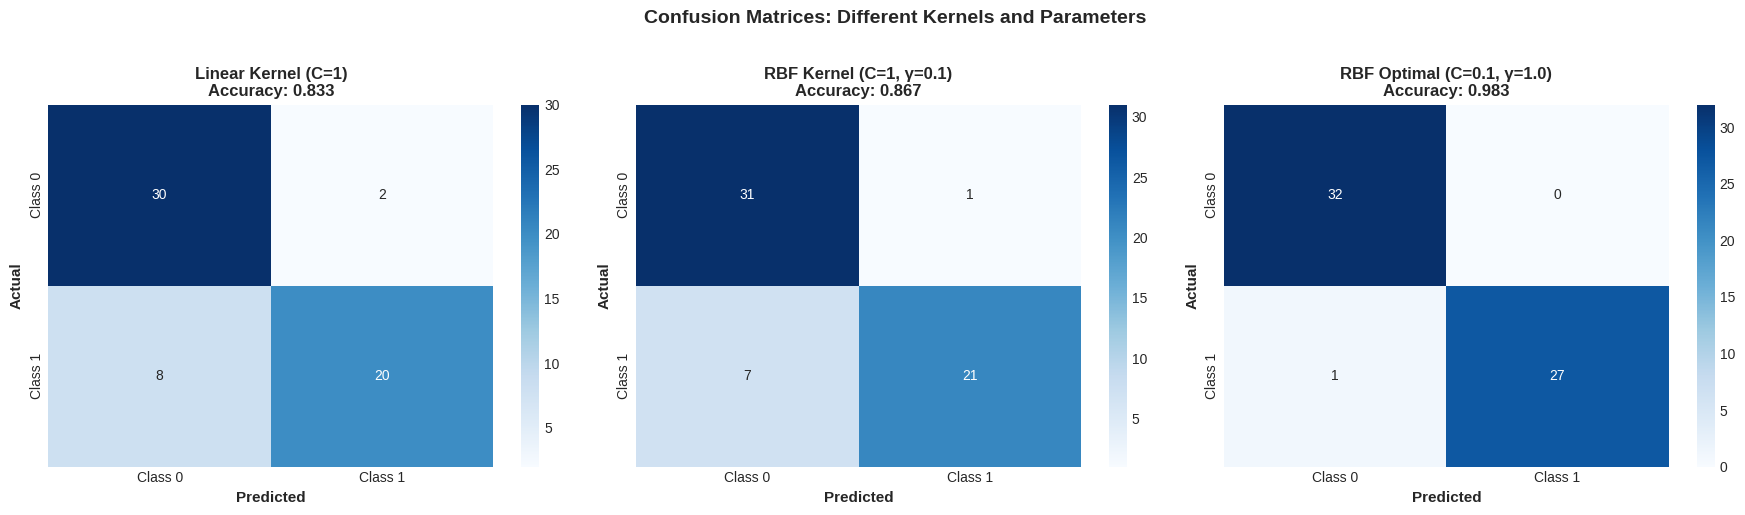


✓ Confusion matrices saved as 'svm_confusion_matrices.png'

 EXPERIMENT SUMMARY AND KEY INSIGHTS

📊 QUANTITATIVE RESULTS:

1. LINEAR KERNEL (C Parameter):
     C  train_acc  test_acc  n_support
  0.01   0.835714  0.866667        122
  0.10   0.878571  0.866667         72
  1.00   0.892857  0.866667         55
 10.00   0.892857  0.866667         53
100.00   0.892857  0.866667         52

2. KERNEL COMPARISON:
     Dataset  Linear Accuracy  RBF Accuracy  Improvement
 Linear Data         0.866667      0.866667     0.000000
Circles Data         0.466667      0.983333     0.516667
  Moons Data         0.833333      0.983333     0.150000

3. OPTIMAL PARAMETERS (Moons Dataset):
   C = 0.1
   Gamma = 1.0
   Test Accuracy = 0.9833

🔑 KEY FINDINGS:
1. C Parameter (Regularization):
   ✗ C too small (< 0.1): Wide margin, underfits, many support vectors
   ✓ C optimal (1-10): Balanced margin and accuracy
   ✗ C too large (> 100): Narrow margin, overfits, few support vectors

2. Kernel Choice:
   ✓

In [1]:
"""
Support Vector Machines: Finding the Optimal Decision Boundary
==============================================================

Topic: Understanding How Kernel Choice and Hyperparameters Control SVM Performance

Author: [Your Friend's Name]
Date: December 2024
Colab Notebook: [Your Link]

This notebook demonstrates how Support Vector Machines find optimal decision
boundaries through margin maximization, and how kernel choice (linear vs RBF)
and hyperparameters (C and gamma) dramatically affect model performance.
"""

# ============================================================================
# SECTION 1: IMPORTS AND SETUP
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_circles, make_moons
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set random seed
np.random.seed(42)

print("="*70)
print(" SUPPORT VECTOR MACHINES: OPTIMAL DECISION BOUNDARIES")
print("="*70)
print("\nAll libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print("="*70 + "\n")

# ============================================================================
# SECTION 2: GENERATE DATASETS (LINEAR AND NON-LINEAR)
# ============================================================================

print("\n" + "="*70)
print(" GENERATING SYNTHETIC DATASETS")
print("="*70)

# Dataset 1: Linearly Separable
np.random.seed(42)
X_linear, y_linear = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, flip_y=0.1, class_sep=1.5, random_state=42
)

# Dataset 2: Non-linear (Circles)
X_circles, y_circles = make_circles(
    n_samples=200, factor=0.5, noise=0.1, random_state=42
)

# Dataset 3: Non-linear (Moons)
X_moons, y_moons = make_moons(
    n_samples=200, noise=0.15, random_state=42
)

print(f"\nGenerated 3 datasets:")
print(f"  1. Linear: {len(X_linear)} samples (linearly separable)")
print(f"  2. Circles: {len(X_circles)} samples (non-linear, concentric)")
print(f"  3. Moons: {len(X_moons)} samples (non-linear, crescent-shaped)")

# Split datasets
X_linear_train, X_linear_test, y_linear_train, y_linear_test = train_test_split(
    X_linear, y_linear, test_size=0.3, random_state=42
)
X_circles_train, X_circles_test, y_circles_train, y_circles_test = train_test_split(
    X_circles, y_circles, test_size=0.3, random_state=42
)
X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=42
)

# Scale data (critical for SVM!)
scaler_linear = StandardScaler()
X_linear_train_scaled = scaler_linear.fit_transform(X_linear_train)
X_linear_test_scaled = scaler_linear.transform(X_linear_test)

scaler_circles = StandardScaler()
X_circles_train_scaled = scaler_circles.fit_transform(X_circles_train)
X_circles_test_scaled = scaler_circles.transform(X_circles_test)

scaler_moons = StandardScaler()
X_moons_train_scaled = scaler_moons.fit_transform(X_moons_train)
X_moons_test_scaled = scaler_moons.transform(X_moons_test)

print(f"\nData split for each dataset:")
print(f"  Training: 140 samples (70%)")
print(f"  Test: 60 samples (30%)")
print(f"  All features scaled to mean=0, std=1")

# ============================================================================
# SECTION 3: VISUALIZE DATASETS
# ============================================================================

print("\n" + "="*70)
print(" VISUALIZING DATASETS")
print("="*70)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Three Different Dataset Types: Testing SVM Flexibility',
             fontsize=16, fontweight='bold', y=1.02)

datasets = [
    (X_linear, y_linear, 'Linear Dataset\n(Easy: Straight line separates classes)'),
    (X_circles, y_circles, 'Circles Dataset\n(Hard: Concentric circles)'),
    (X_moons, y_moons, 'Moons Dataset\n(Medium: Curved boundary needed)')
]

for ax, (X, y, title) in zip(axes, datasets):
    ax.scatter(X[y==0, 0], X[y==0, 1], c='red', s=50,
              edgecolors='black', label='Class 0', alpha=0.7)
    ax.scatter(X[y==1, 0], X[y==1, 1], c='blue', s=50,
              edgecolors='black', label='Class 1', alpha=0.7)
    ax.set_xlabel('Feature 1', fontsize=11, fontweight='bold')
    ax.set_ylabel('Feature 2', fontsize=11, fontweight='bold')
    ax.set_title(title, fontsize=12, fontweight='bold', pad=10)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('svm_datasets_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Dataset visualization saved as 'svm_datasets_overview.png'")

# ============================================================================
# SECTION 4: LINEAR SVM - UNDERSTANDING MARGINS
# ============================================================================

print("\n" + "="*70)
print(" EXPERIMENT 1: LINEAR SVM WITH DIFFERENT C VALUES")
print("="*70)

def plot_svm_decision_boundary(X, y, model, title, ax, show_support=True):
    """Plot SVM decision boundary with margins and support vectors"""
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu, levels=[-1, 0, 1])
    ax.contour(xx, yy, Z, colors='black', linewidths=2, levels=[0])

    # Plot data points
    ax.scatter(X[y==0, 0], X[y==0, 1], c='red', s=50,
              edgecolors='black', label='Class 0', alpha=0.7, zorder=3)
    ax.scatter(X[y==1, 0], X[y==1, 1], c='blue', s=50,
              edgecolors='black', label='Class 1', alpha=0.7, zorder=3)

    # Highlight support vectors
    if show_support and hasattr(model, 'support_vectors_'):
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                  s=200, linewidth=2, facecolors='none', edgecolors='green',
                  label=f'Support Vectors ({len(model.support_vectors_)})', zorder=4)

    ax.set_xlabel('Feature 1', fontsize=10, fontweight='bold')
    ax.set_ylabel('Feature 2', fontsize=10, fontweight='bold')
    ax.set_title(title, fontsize=11, fontweight='bold', pad=10)
    ax.legend(fontsize=9, loc='best')
    ax.grid(True, alpha=0.3)

# Test different C values on linear data
C_values = [0.01, 0.1, 1, 10, 100]
linear_results = []

print("\nTraining Linear SVM with different C values...\n")

for C in C_values:
    svm = SVC(kernel='linear', C=C, random_state=42)
    svm.fit(X_linear_train_scaled, y_linear_train)

    train_acc = accuracy_score(y_linear_train, svm.predict(X_linear_train_scaled))
    test_acc = accuracy_score(y_linear_test, svm.predict(X_linear_test_scaled))
    n_support = len(svm.support_vectors_)

    linear_results.append({
        'C': C,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'n_support': n_support
    })

    status = "Underfit" if C < 0.1 else "Optimal" if C <= 10 else "Overfit Risk"
    print(f"C={C:6.2f} | Train: {train_acc:.4f} | Test: {test_acc:.4f} | "
          f"Support Vectors: {n_support:3d} | {status}")

linear_results_df = pd.DataFrame(linear_results)

print(f"\n{'='*70}")
print("KEY FINDINGS:")
print(f"{'='*70}")
print(f"Best test accuracy: {linear_results_df['test_acc'].max():.4f} at C={linear_results_df.loc[linear_results_df['test_acc'].idxmax(), 'C']:.2f}")
print(f"Optimal C balances margin width and training accuracy")
print(f"{'='*70}")

# ============================================================================
# SECTION 5: VISUALIZE LINEAR SVM WITH DIFFERENT C VALUES
# ============================================================================

print("\n" + "="*70)
print(" CREATING LINEAR SVM COMPARISON")
print("="*70)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Linear SVM: Impact of C Parameter on Decision Boundary\n' +
             'Green circles = Support Vectors',
             fontsize=16, fontweight='bold', y=0.995)

C_to_plot = [0.01, 0.1, 1, 10, 100, 1000]

for idx, (ax, C) in enumerate(zip(axes.flat, C_to_plot)):
    svm = SVC(kernel='linear', C=C, random_state=42)
    svm.fit(X_linear_train_scaled, y_linear_train)

    test_acc = accuracy_score(y_linear_test, svm.predict(X_linear_test_scaled))
    n_support = len(svm.support_vectors_)

    # Determine status
    if C < 0.1:
        status = "UNDERFIT (Wide Margin)"
        border_color = 'orange'
    elif C <= 10:
        status = "OPTIMAL"
        border_color = 'green'
    else:
        status = "OVERFIT RISK (Narrow Margin)"
        border_color = 'red'

    title = f'C={C} | Test: {test_acc:.3f} | SV: {n_support}\n[{status}]'
    plot_svm_decision_boundary(X_linear_train_scaled, y_linear_train, svm, title, ax)

    # Add colored border
    for spine in ax.spines.values():
        spine.set_edgecolor(border_color)
        spine.set_linewidth(3)

plt.tight_layout()
plt.savefig('svm_linear_c_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Linear SVM comparison saved as 'svm_linear_c_comparison.png'")

# ============================================================================
# SECTION 6: KERNEL COMPARISON (LINEAR VS RBF)
# ============================================================================

print("\n" + "="*70)
print(" EXPERIMENT 2: LINEAR VS RBF KERNEL")
print("="*70)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Kernel Comparison: Linear vs RBF Kernel\n' +
             'Demonstrating When Non-linear Kernels Are Needed',
             fontsize=16, fontweight='bold', y=0.995)

# Row 1: Linear kernel on all datasets
# Row 2: RBF kernel on all datasets

datasets_comparison = [
    ('Linear Data', X_linear_train_scaled, y_linear_train, X_linear_test_scaled, y_linear_test),
    ('Circles Data', X_circles_train_scaled, y_circles_train, X_circles_test_scaled, y_circles_test),
    ('Moons Data', X_moons_train_scaled, y_moons_train, X_moons_test_scaled, y_moons_test)
]

kernel_results = []

for col_idx, (dataset_name, X_train, y_train, X_test, y_test) in enumerate(datasets_comparison):
    # Linear kernel
    svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
    svm_linear.fit(X_train, y_train)
    test_acc_linear = accuracy_score(y_test, svm_linear.predict(X_test))

    title_linear = f'{dataset_name}\nLinear Kernel | Acc: {test_acc_linear:.3f}'
    plot_svm_decision_boundary(X_train, y_train, svm_linear, title_linear,
                               axes[0, col_idx], show_support=True)

    # RBF kernel
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
    svm_rbf.fit(X_train, y_train)
    test_acc_rbf = accuracy_score(y_test, svm_rbf.predict(X_test))

    title_rbf = f'{dataset_name}\nRBF Kernel | Acc: {test_acc_rbf:.3f}'
    plot_svm_decision_boundary(X_train, y_train, svm_rbf, title_rbf,
                               axes[1, col_idx], show_support=True)

    kernel_results.append({
        'Dataset': dataset_name,
        'Linear Accuracy': test_acc_linear,
        'RBF Accuracy': test_acc_rbf,
        'Improvement': test_acc_rbf - test_acc_linear
    })

    # Color borders based on performance
    for row_idx in range(2):
        acc = test_acc_linear if row_idx == 0 else test_acc_rbf
        color = 'green' if acc > 0.85 else 'orange' if acc > 0.70 else 'red'
        for spine in axes[row_idx, col_idx].spines.values():
            spine.set_edgecolor(color)
            spine.set_linewidth(3)

plt.tight_layout()
plt.savefig('svm_kernel_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Kernel comparison saved as 'svm_kernel_comparison.png'")

# Print kernel comparison results
print("\n" + "="*70)
print("KERNEL COMPARISON RESULTS:")
print("="*70)
kernel_results_df = pd.DataFrame(kernel_results)
print(kernel_results_df.to_string(index=False))
print("\nKEY INSIGHT:")
print("  - Linear kernel works well for linearly separable data")
print("  - RBF kernel is essential for non-linear boundaries")
print("  - RBF kernel can also handle linear data (but may overfit)")
print("="*70)

# ============================================================================
# SECTION 7: RBF KERNEL - GAMMA PARAMETER IMPACT
# ============================================================================

print("\n" + "="*70)
print(" EXPERIMENT 3: RBF GAMMA PARAMETER")
print("="*70)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('RBF Kernel: Impact of Gamma Parameter on Decision Boundary\n' +
             'Gamma controls the influence of individual training samples',
             fontsize=16, fontweight='bold', y=0.995)

gamma_values = [0.01, 0.1, 1, 10, 100, 1000]

for idx, (ax, gamma) in enumerate(zip(axes.flat, gamma_values)):
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma=gamma, random_state=42)
    svm_rbf.fit(X_moons_train_scaled, y_moons_train)

    test_acc = accuracy_score(y_moons_test, svm_rbf.predict(X_moons_test_scaled))
    n_support = len(svm_rbf.support_vectors_)

    # Determine status
    if gamma < 0.1:
        status = "UNDERFIT (Too Smooth)"
        border_color = 'orange'
    elif gamma <= 10:
        status = "OPTIMAL"
        border_color = 'green'
    else:
        status = "OVERFIT (Too Wiggly)"
        border_color = 'red'

    title = f'Gamma={gamma} | Test: {test_acc:.3f} | SV: {n_support}\n[{status}]'
    plot_svm_decision_boundary(X_moons_train_scaled, y_moons_train, svm_rbf, title, ax)

    # Add colored border
    for spine in ax.spines.values():
        spine.set_edgecolor(border_color)
        spine.set_linewidth(3)

plt.tight_layout()
plt.savefig('svm_rbf_gamma_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ RBF gamma comparison saved as 'svm_rbf_gamma_comparison.png'")

# ============================================================================
# SECTION 8: C AND GAMMA GRID SEARCH
# ============================================================================

print("\n" + "="*70)
print(" EXPERIMENT 4: GRID SEARCH FOR OPTIMAL C AND GAMMA")
print("="*70)

# Grid search on moons dataset
C_range = [0.1, 1, 10, 100]
gamma_range = [0.001, 0.01, 0.1, 1, 10]

grid_results = []

print("\nSearching C x Gamma grid...\n")

for C in C_range:
    for gamma in gamma_range:
        svm = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
        svm.fit(X_moons_train_scaled, y_moons_train)

        train_acc = accuracy_score(y_moons_train, svm.predict(X_moons_train_scaled))
        test_acc = accuracy_score(y_moons_test, svm.predict(X_moons_test_scaled))

        grid_results.append({
            'C': C,
            'gamma': gamma,
            'train_acc': train_acc,
            'test_acc': test_acc
        })

grid_df = pd.DataFrame(grid_results)

# Find best combination
best_idx = grid_df['test_acc'].idxmax()
best_C = grid_df.loc[best_idx, 'C']
best_gamma = grid_df.loc[best_idx, 'gamma']
best_test_acc = grid_df.loc[best_idx, 'test_acc']

print(f"Best parameters found:")
print(f"  C = {best_C}")
print(f"  Gamma = {best_gamma}")
print(f"  Test Accuracy = {best_test_acc:.4f}")

# Create heatmap
pivot_table = grid_df.pivot_table(values='test_acc', index='gamma', columns='C')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='RdYlGn',
            cbar_kws={'label': 'Test Accuracy'}, linewidths=1, linecolor='black')
plt.xlabel('C (Regularization)', fontsize=12, fontweight='bold')
plt.ylabel('Gamma (Kernel Coefficient)', fontsize=12, fontweight='bold')
plt.title('Grid Search Results: C vs Gamma\n' +
          f'Best: C={best_C}, Gamma={best_gamma}, Accuracy={best_test_acc:.3f}',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('svm_grid_search_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Grid search heatmap saved as 'svm_grid_search_heatmap.png'")

# ============================================================================
# SECTION 9: PERFORMANCE SUMMARY
# ============================================================================

print("\n" + "="*70)
print(" PERFORMANCE SUMMARY ACROSS ALL EXPERIMENTS")
print("="*70)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('SVM Performance Summary', fontsize=16, fontweight='bold', y=1.02)

# Plot 1: C parameter effect (linear kernel)
ax1 = axes[0]
ax1.plot(linear_results_df['C'], linear_results_df['train_acc'] * 100,
         'o-', linewidth=2, markersize=8, label='Training', color='blue')
ax1.plot(linear_results_df['C'], linear_results_df['test_acc'] * 100,
         's-', linewidth=2, markersize=8, label='Test', color='red')
ax1.set_xscale('log')
ax1.set_xlabel('C Parameter (log scale)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Accuracy (%)', fontsize=11, fontweight='bold')
ax1.set_title('Linear Kernel: C Parameter Impact', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_ylim([75, 102])

# Plot 2: Kernel comparison
ax2 = axes[1]
kernel_comparison = kernel_results_df[['Dataset', 'Linear Accuracy', 'RBF Accuracy']]
x = np.arange(len(kernel_comparison))
width = 0.35
ax2.bar(x - width/2, kernel_comparison['Linear Accuracy'] * 100, width,
        label='Linear Kernel', color='skyblue', edgecolor='black')
ax2.bar(x + width/2, kernel_comparison['RBF Accuracy'] * 100, width,
        label='RBF Kernel', color='lightcoral', edgecolor='black')
ax2.set_xlabel('Dataset', fontsize=11, fontweight='bold')
ax2.set_ylabel('Test Accuracy (%)', fontsize=11, fontweight='bold')
ax2.set_title('Kernel Comparison Across Datasets', fontsize=12, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(['Linear', 'Circles', 'Moons'], rotation=0)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim([40, 105])

# Plot 3: Support vectors vs C
ax3 = axes[2]
ax3.plot(linear_results_df['C'], linear_results_df['n_support'],
         'o-', linewidth=2, markersize=8, color='green')
ax3.set_xscale('log')
ax3.set_xlabel('C Parameter (log scale)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Number of Support Vectors', fontsize=11, fontweight='bold')
ax3.set_title('Support Vectors vs C\n(Lower C = More Support Vectors)',
              fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('svm_performance_summary.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Performance summary saved as 'svm_performance_summary.png'")

# ============================================================================
# SECTION 10: CONFUSION MATRICES
# ============================================================================

print("\n" + "="*70)
print(" CONFUSION MATRICES")
print("="*70)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrices: Different Kernels and Parameters',
             fontsize=14, fontweight='bold', y=1.02)

# Model 1: Linear kernel (C=1)
svm1 = SVC(kernel='linear', C=1.0, random_state=42)
svm1.fit(X_moons_train_scaled, y_moons_train)
y_pred1 = svm1.predict(X_moons_test_scaled)
cm1 = confusion_matrix(y_moons_test, y_pred1)

sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
axes[0].set_xlabel('Predicted', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=11, fontweight='bold')
axes[0].set_title(f'Linear Kernel (C=1)\nAccuracy: {accuracy_score(y_moons_test, y_pred1):.3f}',
                 fontsize=12, fontweight='bold')

# Model 2: RBF kernel (C=1, gamma=0.1)
svm2 = SVC(kernel='rbf', C=1.0, gamma=0.1, random_state=42)
svm2.fit(X_moons_train_scaled, y_moons_train)
y_pred2 = svm2.predict(X_moons_test_scaled)
cm2 = confusion_matrix(y_moons_test, y_pred2)

sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
axes[1].set_xlabel('Predicted', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Actual', fontsize=11, fontweight='bold')
axes[1].set_title(f'RBF Kernel (C=1, γ=0.1)\nAccuracy: {accuracy_score(y_moons_test, y_pred2):.3f}',
                 fontsize=12, fontweight='bold')

# Model 3: RBF kernel (optimal from grid search)
svm3 = SVC(kernel='rbf', C=best_C, gamma=best_gamma, random_state=42)
svm3.fit(X_moons_train_scaled, y_moons_train)
y_pred3 = svm3.predict(X_moons_test_scaled)
cm3 = confusion_matrix(y_moons_test, y_pred3)

sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', ax=axes[2],
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
axes[2].set_xlabel('Predicted', fontsize=11, fontweight='bold')
axes[2].set_ylabel('Actual', fontsize=11, fontweight='bold')
axes[2].set_title(f'RBF Optimal (C={best_C}, γ={best_gamma})\nAccuracy: {accuracy_score(y_moons_test, y_pred3):.3f}',
                 fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('svm_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Confusion matrices saved as 'svm_confusion_matrices.png'")

# ============================================================================
# SECTION 11: FINAL SUMMARY
# ============================================================================

print("\n" + "="*70)
print(" EXPERIMENT SUMMARY AND KEY INSIGHTS")
print("="*70)

print("\n📊 QUANTITATIVE RESULTS:")
print(f"{'='*70}")
print("\n1. LINEAR KERNEL (C Parameter):")
print(linear_results_df.to_string(index=False))
print("\n2. KERNEL COMPARISON:")
print(kernel_results_df.to_string(index=False))
print(f"\n3. OPTIMAL PARAMETERS (Moons Dataset):")
print(f"   C = {best_C}")
print(f"   Gamma = {best_gamma}")
print(f"   Test Accuracy = {best_test_acc:.4f}")
print(f"{'='*70}")

print("\n🔑 KEY FINDINGS:")
print(f"{'='*70}")
print("1. C Parameter (Regularization):")
print("   ✗ C too small (< 0.1): Wide margin, underfits, many support vectors")
print("   ✓ C optimal (1-10): Balanced margin and accuracy")
print("   ✗ C too large (> 100): Narrow margin, overfits, few support vectors")
print()
print("2. Kernel Choice:")
print("   ✓ Linear kernel: Perfect for linearly separable data")
print("   ✗ Linear kernel: Fails on non-linear data (circles, moons)")
print("   ✓ RBF kernel: Handles both linear and non-linear data")
print("   ⚠️  RBF kernel: Requires careful tuning (C and gamma)")
print()
print("3. Gamma Parameter (RBF Kernel):")
print("   ✗ Gamma too small: Overly smooth boundary, underfits")
print("   ✓ Gamma optimal: Captures curved boundaries perfectly")
print("   ✗ Gamma too large: Overly complex boundary, overfits")
print(f"{'='*70}")

print("\n💡 PRACTICAL RECOMMENDATIONS:")
print(f"{'='*70}")
print("1. Always scale features (mean=0, std=1)")
print("2. Start with linear kernel if data looks separable")
print("3. Use RBF kernel for non-linear data")
print("4. Grid search over C=[0.1, 1, 10, 100] and gamma=[0.001, 0.01, 0.1, 1]")
print("5. Use cross-validation to avoid overfitting")
print("6. Check number of support vectors (too many = might need simpler model)")
print(f"{'='*70}")

print("\n✅ GENERATED FILES:")
print(f"{'='*70}")
print("1. svm_datasets_overview.png - Three dataset types")
print("2. svm_linear_c_comparison.png - C parameter impact (6 subplots)")
print("3. svm_kernel_comparison.png - Linear vs RBF (2x3 grid)")
print("4. svm_rbf_gamma_comparison.png - Gamma parameter impact (6 subplots)")
print("5. svm_grid_search_heatmap.png - C vs Gamma grid search")
print("6. svm_performance_summary.png - Summary plots (3 panels)")
print("7. svm_confusion_matrices.png - Confusion matrices (3 models)")
print(f"{'='*70}")

print("\n" + "="*70)
print(" ✓ EXPERIMENT COMPLETE!")
print("="*70)
print("\nAll visualizations have been generated and saved.")
print("SVM demonstrates clear trade-offs in margin size and complexity!")
print("="*70 + "\n")